# Scenario with building limiting the view

In [1]:
import sys  
sys.path.insert(0, 'python/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulation import step_simulation
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation

### Plot function used for the visualizations

In [2]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(0,120)
    plt.ylim(-40,40)

### Import the scenario

In [3]:
with open("scenario_building/config_recreated.yaml") as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
scenario1, _ = CommonRoadFileReader("scenario_building/DEU_Ffb-1_4_recreation.xml").open()
scenario2, _ = CommonRoadFileReader("scenario_building/DEU_Ffb-1_4_recreation.xml").open()

### Simulations (It will take some time)

In [4]:
track_vehicle, tracked_scenarios, tracked_views = step_simulation(scenario1, config)

Initialising Occlusion Tracker
In simulation step  0
Initialised with 30 initial shadows
Update computational time:  0.000362396240234375
Time for minkowski_sum: 416.217ms
Time for minkowski_sum: 359.576ms
Time for minkowski_sum: 374.589ms
Time for minkowski_sum: 365.652ms
Total minkowski sum time for this polygon: 1516.03ms
Time for minkowski_sum: 275.119ms
Time for minkowski_sum: 271.408ms
Time for minkowski_sum: 269.196ms
Time for minkowski_sum: 268.658ms
Total minkowski sum time for this polygon: 1084.38ms
Time for minkowski_sum: 147.498ms
Time for minkowski_sum: 152.416ms
Time for minkowski_sum: 155.119ms
Time for minkowski_sum: 150.527ms
Total minkowski sum time for this polygon: 605.561ms
Time for minkowski_sum: 349.494ms
Time for minkowski_sum: 360.461ms
Time for minkowski_sum: 353.929ms
Time for minkowski_sum: 355.795ms
Total minkowski sum time for this polygon: 1419.68ms
Time for minkowski_sum: 180.086ms
Time for minkowski_sum: 178.581ms
Time for minkowski_sum: 180.695ms
Time

KeyboardInterrupt: 

### Plots

In [ ]:
# t1 = 15
# t2 = 30
# fig, ax = plt.subplots(2, 2, figsize=(20,13))
# plt.sca(ax[1][0])
# plot(t1, track_vehicle, tracked_scenarios, tracked_views)
# plt.sca(ax[1][1])
# plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the proposed method

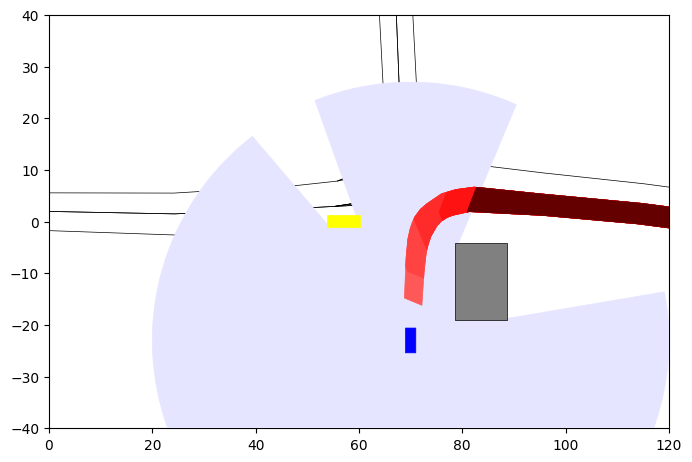

In [ ]:
from IPython.display import HTML

fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Velocity comparison

In [ ]:
plt.figure(figsize=(12, 4))
labels = ['Proposed method','Baseline method']
for idx, vehicle in enumerate([track_vehicle, no_track_vehicle]):
    velocities = [round(vehicle.initial_state.velocity, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.ylim(0, 10)

NameError: name 'no_track_vehicle' is not defined

<Figure size 1200x400 with 0 Axes>